### Univariate linear regression using gradient descent


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

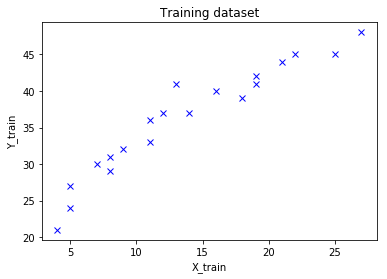

In [16]:
data_train = np.zeros((2,20))
data_train[0] = [4, 5, 5, 7, 8, 8, 9, 11, 11, 12, 13, 14, 16, 18, 19, 19, 21, 22, 25, 27] #x (input)
data_train[1] = [21, 24, 27, 30, 29, 31, 32, 33, 36, 37, 41, 37, 40, 39, 41, 42, 44, 45, 45, 48] #y (what we want to predict)

data_test = np.zeros((2,5))
data_test[0] = [40, 15, 19, 23, 6] #x (input)
data_test[1] = [61, 39, 43, 46, 26] #y (what we want to predict)








In [28]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_train[0].reshape(-1, 1), data_train[1].reshape(-1, 1))

# Make predictions using the testing set
data_test_pred = regr.predict(data_test[0].reshape(-1, 1))

[[1.03480381]]
[21.92318776]
Mean squared error: 2.88
Variance score: 0.98


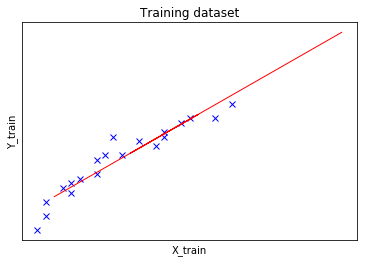

In [29]:
# The coefficients
print regr.coef_
print regr.intercept_
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(data_test[1].reshape(-1, 1), data_test_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(data_test[1].reshape(-1, 1), data_test_pred))

# Plot outputs
plt.plot(data_train[0], data_train[1], 'bx')
plt.plot(data_test[0], data_test_pred, color='red', linewidth=1)
plt.ylabel('Y_train')
plt.xlabel('X_train')
plt.title('Training dataset')
plt.xticks(())
plt.yticks(())

plt.show()

In [44]:
import pytorch as torch

ImportError: No module named pytorch

In [43]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


X, y = load_iris(return_X_y=True)

print X.shape
X_1 = X[:,0].reshape(-1,1)
print X_1.shape
print y.shape

# Using only one feature
classifier1 = LogisticRegression(random_state=0).fit(X_1, y)
classifier1.predict(X[:2, 0])
classifier1.predict_proba(X[:2, 0]) 
classifier1.score(X_1, y)


(150, 4)
(150, 1)
(150,)


ValueError: Expected 2D array, got 1D array instead:
array=[5.1 4.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Using only one feature
classifier1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

classifier1.predict(X[:2, :])

classifier1.predict_proba(X[:2, :]) 

classifier1.score(X, y)

In [4]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

#### Dataset

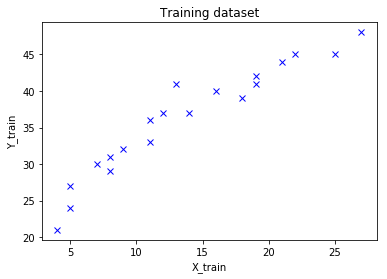

In [160]:
data_train = np.zeros((2,20))
data_train[0] = [4, 5, 5, 7, 8, 8, 9, 11, 11, 12, 13, 14, 16, 18, 19, 19, 21, 22, 25, 27] #x (input)
data_train[1] = [21, 24, 27, 30, 29, 31, 32, 33, 36, 37, 41, 37, 40, 39, 41, 42, 44, 45, 45, 48] #y (what we want to predict)

plt.plot(data_train[0], data_train[1], 'bx')
plt.ylabel('Y_train')
plt.xlabel('X_train')
plt.title('Training dataset')
plt.show()

#### Implement prediction function

- Based on hypothesis h(x) = t0 + t1*x

In [161]:
def make_prediction(X, t0, t1):
    y = (t1 * X) + t0
    return y

#### Implement cost function

- Using standard mean squared error

In [163]:
def compute_cost(y, y_predicted):
    squared_differences = [data**2 for data in (y-y_predicted)]
    cost = sum(squared_differences) / float(len(y))   
    return cost

#### Implement gradient descent function

- For each epoch:
    - Compute the predicted y values using the current t0 and t1 values
    - Compute the cost function on the entire dataset
    - Compute the gradients
    - Update the current t0 and t1 values with gradient descent

In [164]:
def gradient_descent(X, y, t0_current=0, t1_current=0, epochs=1000, learning_rate=0.0001):
    cost_array = np.zeros((4,epochs))
    for i in range(epochs):
        y_current = make_prediction(X, t0_current, t1_current)
        cost = compute_cost(y, y_current)
        t1_grad = -2/float(len(y)) * sum(X * (y - y_current))
        t0_grad = -2/float(len(y)) * sum(y - y_current)        
        t1_current = t1_current - (learning_rate * t1_grad)
        t0_current = t0_current - (learning_rate * t0_grad) 
        cost_array[:,i] = [i, cost, t0_current, t1_current]    
    return t1_current, t0_current, cost, cost_array

#### Run the algorithm

In [169]:
[t1_current, t0_current, cost, cost_array] = gradient_descent(data_train[0], data_train[1], t0_current=0, t1_current=0, epochs=20000, learning_rate=0.001)

print "The is h(x) = t0 + t1*x with t0 = {0} and t1 = {1}.".format(t0_current, t1_current)
print "This solution has a cost of {0}.".format(cost)

The is h(x) = t0 + t1*x with t0 = 21.9135713207 and t1 = 1.03537019878.
This solution has a cost of 5.08537594685.


#### Plot the hypothesis

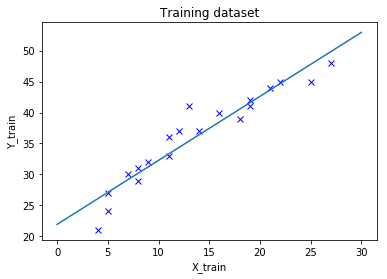

In [170]:
plt.plot(data_train[0], data_train[1], 'bx')
plt.ylabel('Y_train')
plt.xlabel('X_train')
plt.title('Training dataset')
h = np.linspace(0, 30, 100)
plt.plot(h, t0_current+t1_current*h)
plt.show()

#### Plot the cost vs the number of epochs

- Useful to make sure that your algorithm is learning and the cost is being minimized
- We can observe that the algorithm starts to converge after 2500 epochs

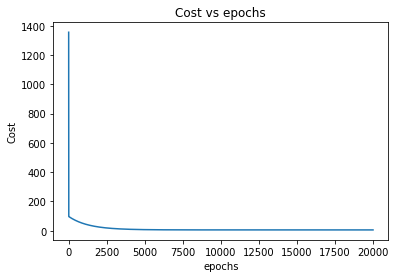

In [171]:
plt.plot(cost_array[0], cost_array[1])
plt.ylabel('Cost')
plt.xlabel('epochs')
plt.title('Cost vs epochs')
plt.show()

#### Plot the evolution of the t0 param. vs the number of epochs

- We initialized the t0 param. to 0 here.

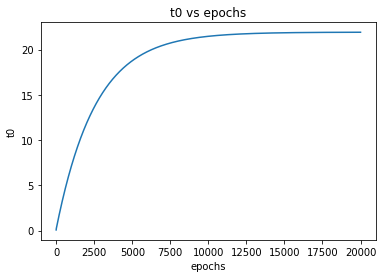

In [173]:
plt.plot(cost_array[0], cost_array[2])
plt.ylabel('t0')
plt.xlabel('epochs')
plt.title('t0 vs epochs')
plt.show()

#### Plot the evolution of the t1 param. vs the number of epochs

- We initialized the t1 param. to 0 here.

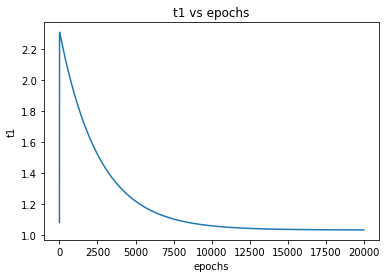

In [175]:
plt.plot(cost_array[0], cost_array[3])
plt.ylabel('t1')
plt.xlabel('epochs')
plt.title('t1 vs epochs')
plt.show()